Importy i wstępne przygotowanie danych

In [87]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from sklearn.metrics import davies_bouldin_score as dbScore
import matplotlib.pyplot as plt
import seaborn as sns
import random

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/')
base_data = pd.read_csv("beacon_readings.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("beacon_readings.csv")
df.columns

Index(['Distance A', 'Distance B', 'Distance C', 'Position X', 'Position Y',
       'Date', 'Time'],
      dtype='object')

In [5]:
df = df.drop(columns = ['Date'])
df = df.drop(columns = ['Time'])
df.columns
display(df)

,Distance A,Distance B,Distance C,Position X,Position Y
0,0.877463,0.768609,1.457215,122,180
1,1.201608,1.031228,1.893498,122,180
2,1.614344,1.098873,2.112560,122,180
3,1.533095,1.123157,2.233098,122,180
4,1.481930,1.114962,2.317804,122,180
...,...,...,...,...,...
245,0.904473,1.056633,1.966141,122,223
246,0.894097,1.067867,1.954488,122,223
247,0.954574,1.079314,1.928066,122,223
248,0.904473,1.087064,1.901409,122,223


Pierwsze środki skupień

In [200]:
def spitPlots(data, centroids, cluster):
  sns.scatterplot(data['Position X'], data['Position Y'], c = cluster)
  sns.scatterplot(centroids[:,len(centroids)-2], centroids[:, len(centroids)-1], s=50, color='r')
  plt.xlabel('Position X')
  plt.ylabel('Position Y')
  plt.show()

In [201]:
def kMeans(data, k):
  #data = data.loc[:, ['Position X', 'Position Y']]
  #data['Position X'] = df.apply(lambda row : row['Position X'] + random.randint(-6, 6), axis = 1)
  #data['Position Y'] = df.apply(lambda row : row['Position Y'] + random.randint(-6, 6), axis = 1)
  #X = data.values
  #sns.scatterplot(X[:,0], X[:, 1])
  #plt.xlabel('Position X')
  #plt.ylabel('Position Y')
  #plt.show()
  #['Distance A', 'Distance B', 'Distance C']
  data_N = data.loc[:, :]
  X = data_N.values
  #display(X)
  sw = True
  cluster = np.zeros(X.shape[0])
  centroids = data_N.sample(k).values
  #display(centroids)
  while sw:
    for i, row in enumerate(X):
      minDist = float('inf')
      for idx, centroid in enumerate(centroids):
        dist = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2 + (centroid[2]-row[2])**2)
        if minDist > dist:
          minDist = dist
          cluster[i] = idx
    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    if np.count_nonzero(centroids-new_centroids) == 0:
      sw = False
    else:
      centroids = new_centroids
  #print('Input ', len(X))
  #print('No. centroids: ', len(centroids))
  #print('Suma pkt w klastrach: ', len(cluster))

  return centroids, cluster

2.5408971803739315


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


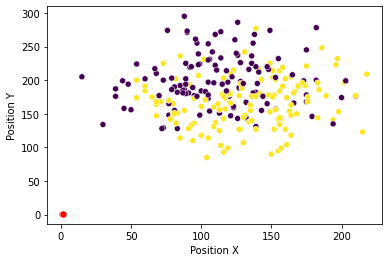

3.402334678408806


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


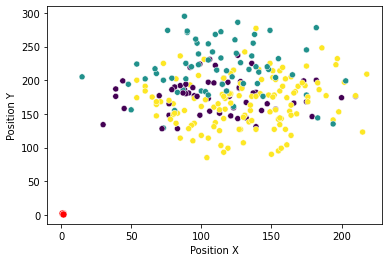

3.8188791709000878


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


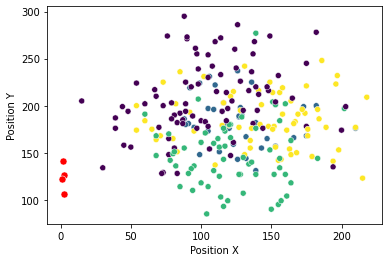

4.65046764032582


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


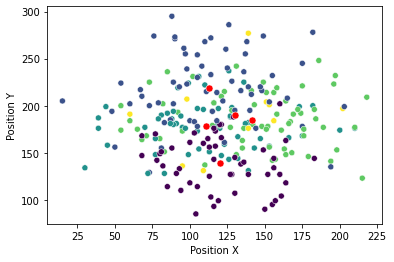

4.478807251963273


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


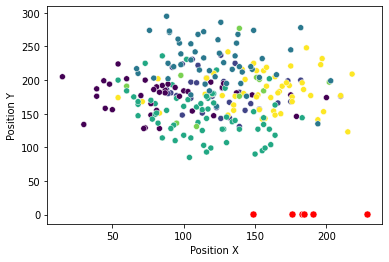

Najepsze wyniki osiąga dla K =  2


In [219]:
list = []
df_copy = df
df_copy['Position X'] = df_copy.apply(lambda row : row['Position X'] + random.randint(-6, 6), axis = 1)
df_copy['Position Y'] = df_copy.apply(lambda row : row['Position Y'] + random.randint(-6, 6), axis = 1)
for i in range(2,7):
  centroids, cluster = kMeans(df, i)
  #display(centroids[:,len(centroids)])
  print(dbScore(df, cluster))
  list.append(dbScore(df, cluster))
  spitPlots(df_copy, centroids, cluster)
bestK = list.index(min(list)) + 2
print('Najepsze wyniki osiąga dla K = ', bestK)
with open('s21072kMeansWyniki.txt', 'w') as f:
  for line in list:
    f.write(str(line))
    f.write('\n')
  f.write( '\nNajepsze wyniki osiąga dla K = {b}'.format(b = bestK))